# TP 3

Integrantes: Augusto Rabbia, Manuel Spreutels

IIA 2024

In [972]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

## Ejercicio 1

In [973]:
def espirales(n):
	angles = np.random.uniform(0, 2*np.pi, n)
	radii = np.sqrt(np.random.uniform(0, 1, n))

	# Convert to Cartesian coordinates
	x_coords = radii * np.cos(angles)
	y_coords = radii * np.sin(angles)

	# Generar n/2 puntos para cada clase
	n_half = n // 2
	
	# Etiquetas para cada clase
	clases = []
	
	for i in range(n):
		theta = angles[i]
		ro = radii[i]
		if (theta / (4 * np.pi)) <= ro <= ((theta + np.pi) / (4 * np.pi)):
			clases.append(1)
		elif ((2*np.pi+theta) / (4 * np.pi)) <= ro <= ((theta + 3*np.pi) / (4 * np.pi)):
			clases.append(1)
		elif ((-2*np.pi+theta) / (4 * np.pi)) <= ro <= ((theta - np.pi) / (4 * np.pi)):
			clases.append(1)
		else: clases.append(0)

	return ((x_coords, y_coords), clases)
#Generar conjuntos de entrenamiento
(coords, clase1) = espirales(150)
df150 = pd.DataFrame({"x":coords[0], "y":coords[1]})
(coords, clase2) = espirales(600)
df600 = pd.DataFrame({"x":coords[0], "y":coords[1]})
(coords, clase3) = espirales(3000)
df3000 = pd.DataFrame({"x":coords[0], "y":coords[1]})
# Conjunto de test
(coordsTest, Ytest) = espirales(10000)
Xtest = pd.DataFrame({"x":coordsTest[0], "y":coordsTest[1]})

In [974]:
def graficarRes(y_pred, X_test):
	x_clase_0 = []
	y_clase_0 = []
	x_clase_1 = []
	y_clase_1 = []
	for i in range(len(y_pred)):
		if y_pred[i] == 0:
			x_clase_0.append(X_test.iloc[i]["x"])
			y_clase_0.append(X_test.iloc[i]["y"])
		else:
			x_clase_1.append(X_test.iloc[i]["x"])
			y_clase_1.append(X_test.iloc[i]["y"])
	
	plt.scatter(x_clase_0, y_clase_0, color='red')
	plt.scatter(x_clase_1, y_clase_1, color='blue')
	plt.grid(True)
	plt.show()


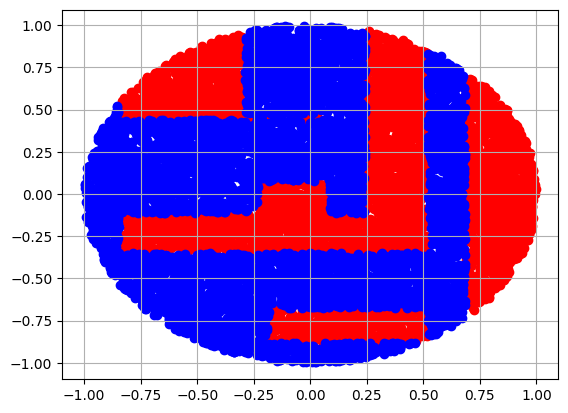

In [975]:
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
clf.fit(df150, clase1)
y_pred = clf.predict(Xtest, Ytest)

graficarRes(y_pred, Xtest)

600 Casos

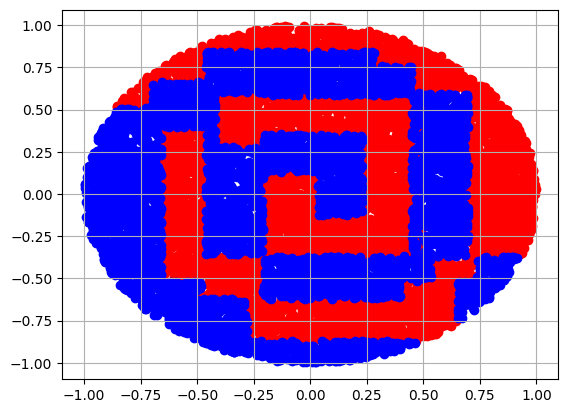

In [976]:
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
clf.fit(df600, clase2)
y_pred = clf.predict(Xtest, Ytest)

graficarRes(y_pred, Xtest)

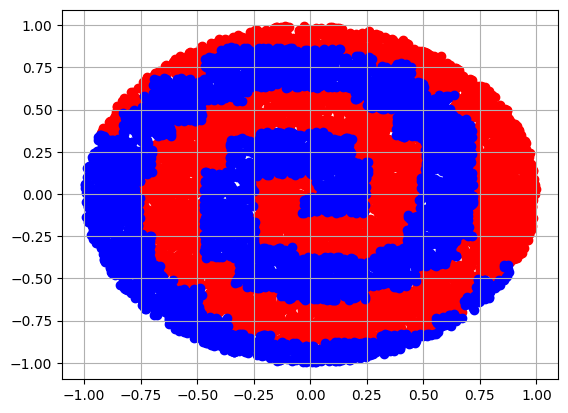

In [977]:
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
clf.fit(df3000, clase3)
y_pred = clf.predict(Xtest, Ytest)

graficarRes(y_pred, Xtest)

Podemos observar que en este caso, el arbol de decisión utiliza una función de clasificación que divide el espacio en rectángulos, donde, a mayor cantidad de datos de entrada, mejora su precisión, con una mayor cantidad de rectángulos de menor tamaño.

Esto se debe a que la inferencia se hace a través de comparaciones de tipo "menor que" o "mayor que" valores fijos, lo cual naturalmente genera áreas de estas características, similar a intervalos en matemáticas.

## Ejercicio 2

### Diagonales

Importamos la función de diagonales

In [978]:
def diagonales(n, d, C):
	# Verificar que n sea par para poder dividir los datos equitativamente entre las dos clases
	if n % 2 != 0:
		raise ValueError("n debe ser un número par")

	# Parámetros para la clase 1
	mean1 = np.ones(d)
	cov_matrix = np.eye(d) * (C * np.sqrt(d)) ** 2
	
	# Parámetros para la clase 0
	mean0 = -np.ones(d)
	
	# Generar n/2 puntos para cada clase
	datos_clase_1 = np.random.multivariate_normal(mean1, cov_matrix, n//2)
	datos_clase_0 = np.random.multivariate_normal(mean0, cov_matrix, n//2)
	
	# Concatenar los datos y las etiquetas
	datos = np.vstack((datos_clase_1, datos_clase_0))
	
	return datos

Creamos los datasets de entrenamiento y testing

In [979]:
def crear_conjs_diag(n, d, C, cant):
	clases = np.concatenate((np.array([1 for _ in range(n//2)]), np.array([0 for _ in range(n//2)])))

	dfs = []
	for i in range(cant):
		coords = diagonales(n,d,C)
		dic = dict()
		for dim in range(d):
			dic[dim] = [x[dim] for x in coords]
		dfs.append(pd.DataFrame(dic))
	return (dfs, clases)

In [980]:
# El primer dataset lo creamos con 126 datos para que ambas clases tengan la misma cantidad de datos.
(dfs126, clases126) = crear_conjs_diag(126, 2, 0.78, 20)
(dfs250, clases250) = crear_conjs_diag(250, 2, 0.78, 20)
(dfs500, clases500) = crear_conjs_diag(500, 2, 0.78, 20)
(dfs1000, clases1000) = crear_conjs_diag(1000, 2, 0.78, 20)
(dfs2000, clases2000) = crear_conjs_diag(2000, 2, 0.78, 20)
(dfs4000, clases4000) = crear_conjs_diag(4000, 2, 0.78, 20)
(dftestL, clasestest) = crear_conjs_diag(10000, 2, 0.78, 1)
dftest = dftestL[0]

Creamos y evaluamos los modelos

In [981]:
def metricas2d(dfs, clases, dfsresultados, columnaresultados, dftest, clasestest):
	# dfs resultados = (errores_entrenamiento, errores_test, numnodos)

	graficar = np.random.randint(20)

	errs_test = []
	errs_train = []
	nnodes = []
	for i in range(20):
		# Creando árbol de decisión
		clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
		clf.fit(dfs[i], clases)

		# Prediciendo sobre el conjunto de test y de entrenamiento 
		y_pred_test = clf.predict(dftest)
		y_pred_train = clf.predict(dfs[i])
		
		# Guardando resultados
		errs_test.append(1-accuracy_score(clasestest, y_pred_test))
		errs_train.append(1-accuracy_score(clases, y_pred_train))
		nnodes.append(clf.tree_.node_count)


		if i == graficar:
			pred_clase_0_x = []
			pred_clase_1_x = []
			pred_clase_0_y = []
			pred_clase_1_y = []
			for k in range(len(y_pred_test)):
				if y_pred_test[k] == 0:
					pred_clase_0_x.append(dftest.iloc[k][0])
					pred_clase_0_y.append(dftest.iloc[k][1])
				else: 
					pred_clase_1_x.append(dftest.iloc[k][0])
					pred_clase_1_y.append(dftest.iloc[k][1])

			plt.scatter(pred_clase_0_x, pred_clase_0_y, color="blue")
			plt.scatter(pred_clase_1_x, pred_clase_1_y, color="red")
			plt.title(f"Gráfico del resultado del entrenamiento {graficar} para el árbol con {columnaresultados} datos de entrenamiento")
			plt.grid(True)
			plt.show()

		
	dfsresultados[0][columnaresultados] = errs_train
	dfsresultados[1][columnaresultados] = errs_test
	dfsresultados[2][columnaresultados] = nnodes

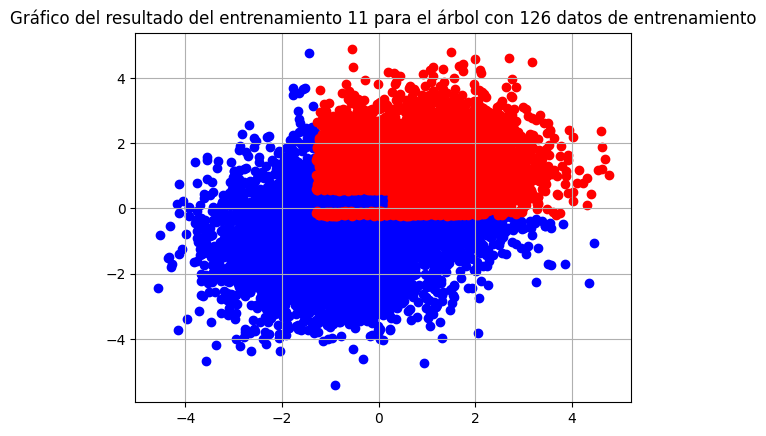

In [982]:
# Diccionarios con las métricas
errores_entrenamiento_diag = pd.DataFrame({"126":[], "250":[], "500":[], "1000":[], "2000":[], "4000":[]})
errores_test_diag = pd.DataFrame({"126":[], "250":[], "500":[], "1000":[], "2000":[], "4000":[]})
numnodos_diag = pd.DataFrame({"126":[], "250":[], "500":[], "1000":[], "2000":[], "4000":[]})

metricas2d(dfs126, clases126, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "126", dftest, clasestest)

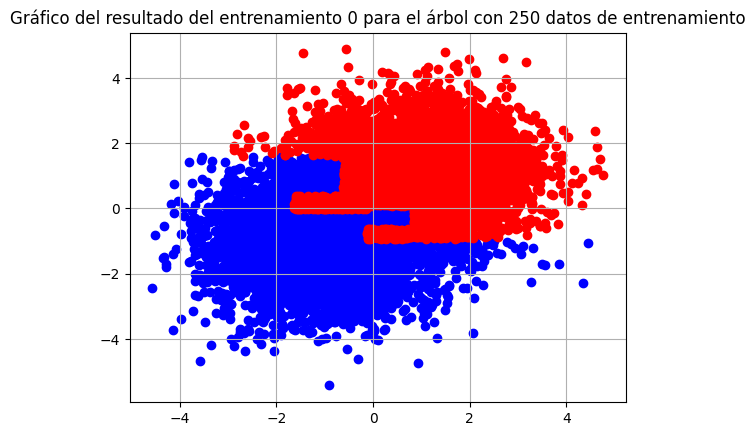

In [983]:
metricas2d(dfs250, clases250, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "250", dftest, clasestest)

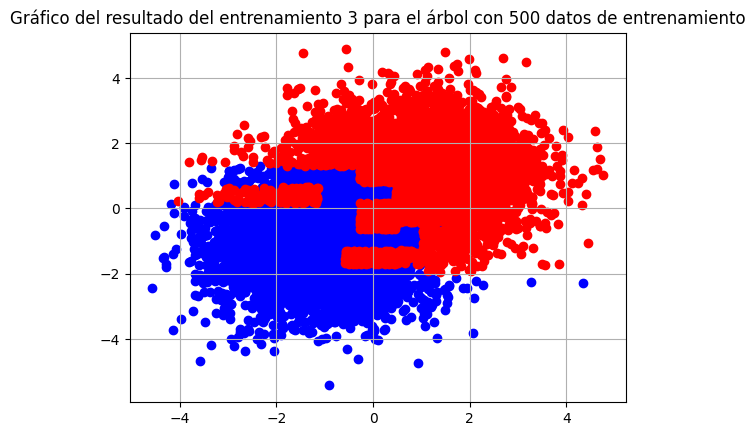

In [984]:
metricas2d(dfs500, clases500, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "500", dftest, clasestest)

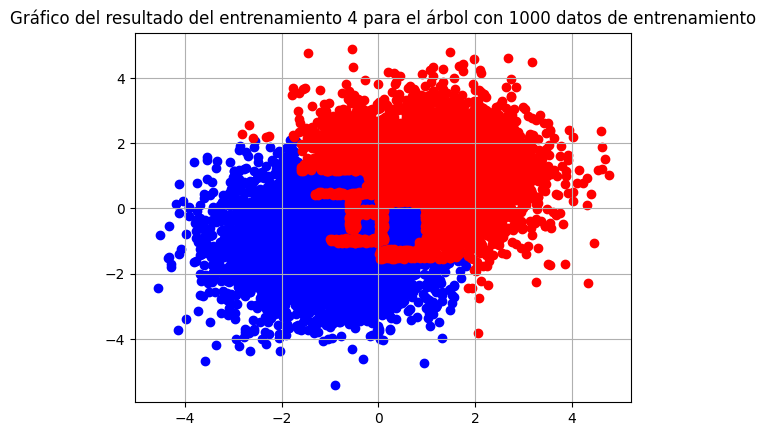

In [985]:
metricas2d(dfs1000, clases1000, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "1000", dftest, clasestest)

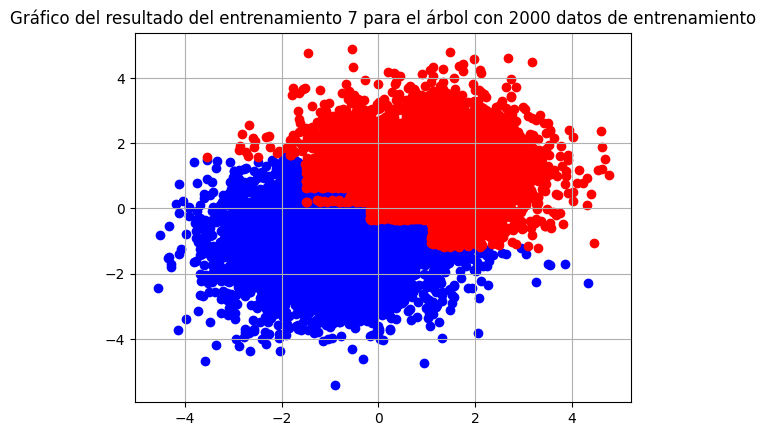

In [986]:
metricas2d(dfs2000, clases2000, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "2000", dftest, clasestest)

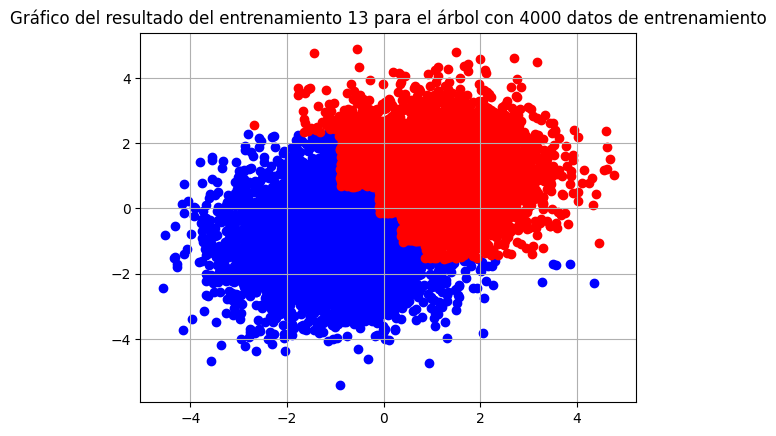

In [987]:
metricas2d(dfs4000, clases4000, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "4000", dftest, clasestest)

A primera vista, incrementar la cantidad de datos de entrenamiento no parece traducirse en un modelo mejor. 

Esto puede deberse a la forma en que se distribuyen las clases en estos sets: las dos clases están entremezcladas. Es decir, para valores más cercanos al centro, no bastará con sólo conocer las coordenadas de un punto para saber la clase a la que pertenecerá.

Por otro lado, para valores más lejanos al origen, todos los modelos pudieron predecir correctamente la clase a la que predecían, al ser más fácil su clasificación en este caso, no habiendo entremezclado en las clases. 

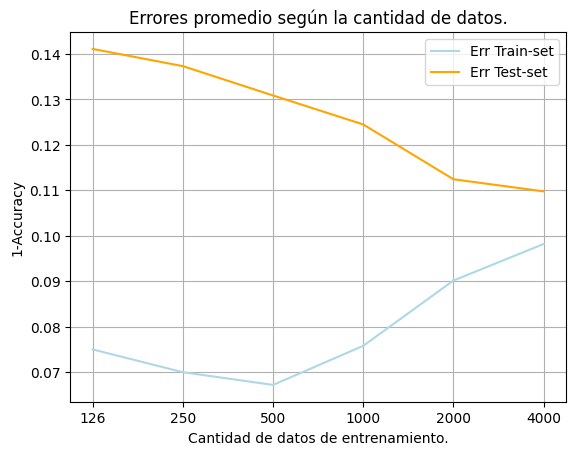

In [988]:
x = errores_entrenamiento_diag.mean().index
y = errores_entrenamiento_diag.mean()
plt.plot(x, y, color="lightblue", label="Err Train-set")
x = errores_test_diag.mean().index
y = errores_test_diag.mean()
plt.plot(x, y, color="orange", label="Err Test-set")
plt.xlabel("Cantidad de datos de entrenamiento.")
plt.ylabel("1-Accuracy")
plt.legend()
plt.title("Errores promedio según la cantidad de datos.")
plt.grid(True)
plt.show()

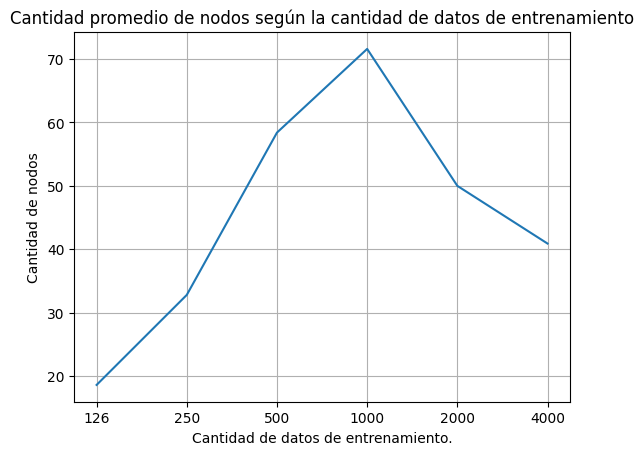

In [989]:
x = numnodos_diag.mean().index
y = numnodos_diag.mean()
plt.plot(x,y)
plt.title("Cantidad promedio de nodos según la cantidad de datos de entrenamiento")
plt.xlabel("Cantidad de datos de entrenamiento.")
plt.ylabel("Cantidad de nodos")
plt.grid(True)
plt.show()

Luego de observar las métricas, se observa que los modelos obtenidos son marginalmente superiores para predecir sobre el conjunto de test a medida que incrementa la cantidad de datos de entrenamiento. Sin embargo, resulta interesante que el error sobre el set de entrenamiento aumenta a medida que el set de entrenamiento es más grande.

Además, llama mucho la atención que llegado a cierto punto, la cantidad de nodos comienza a disminuir, mientras que el error continúa decreciendo. Es decir, a partir de cierto punto, el modelo conseguido no sólo es más preciso, sino que logra obtener estos resultados de forma más eficiente.

Algo que podría explicar todos estos fenómenos es que a medida que incremenetamos el tamaño del conjunto de entrenamiento llegado a cierto punto, se reduce la complejidad del modelo y por lo tanto su overfitting.

### Paralelas

Importamos la función de paralelas

In [990]:
def paralelas(n, d, C):
    # Verificar que n sea par para poder dividir los datos equitativamente entre las dos clases
    if n % 2 != 0:
        raise ValueError("n debe ser un número par")

    # Parámetros para la clase 1
    mean1 = np.zeros(d)
    mean1[0] = 1  # Centro en (1, 0, 0, ..., 0)
    cov_Matrix = np.diag([C*C] * d)  # Matriz de covarianza diagonal con desviación estándar C
    
    # Parámetros para la clase 0
    mean0 = np.zeros(d)
    mean0[0] = -1  # Centro en (-1, 0, 0, ..., 0)
    
    # Generar n/2 puntos para cada clase
    n_half = n // 2
    datos_clase_1 = np.random.multivariate_normal(mean1, cov_Matrix, n_half)
    datos_clase_0 = np.random.multivariate_normal(mean0, cov_Matrix, n_half)
    
    # Etiquetas para cada clase
    etiquetas_clase_1 = np.ones(n_half)
    etiquetas_clase_0 = np.zeros(n_half)
    
    # Concatenar los datos y las etiquetas
    datos = np.vstack((datos_clase_1, datos_clase_0))
   
    return datos

Creamos los datasets de entrenamiento y testing

In [991]:
def crear_conjs_paralelas(n, d, C, cant):
	clases = np.concatenate((np.array([1 for _ in range(n//2)]), np.array([0 for _ in range(n//2)])))

	dfs = []
	for i in range(cant):
		coords = paralelas(n,d,C)
		dic = dict()
		for dim in range(d):
			dic[dim] = [x[dim] for x in coords]
		dfs.append(pd.DataFrame(dic))
	return (dfs, clases)

In [992]:
# El primer dataset lo creamos con 126 datos para que ambas clases tengan la misma cantidad de datos.
(dfs126, clases126) = crear_conjs_paralelas(126, 2, 0.78, 20)
(dfs250, clases250) = crear_conjs_paralelas(250, 2, 0.78, 20)
(dfs500, clases500) = crear_conjs_paralelas(500, 2, 0.78, 20)
(dfs1000, clases1000) = crear_conjs_paralelas(1000, 2, 0.78, 20)
(dfs2000, clases2000) = crear_conjs_paralelas(2000, 2, 0.78, 20)
(dfs4000, clases4000) = crear_conjs_paralelas(4000, 2, 0.78, 20)
(dftestL, clasestest) = crear_conjs_paralelas(10000, 2, 0.78, 1)
dftest = dftestL[0]

Creamos y evaluamos los modelos

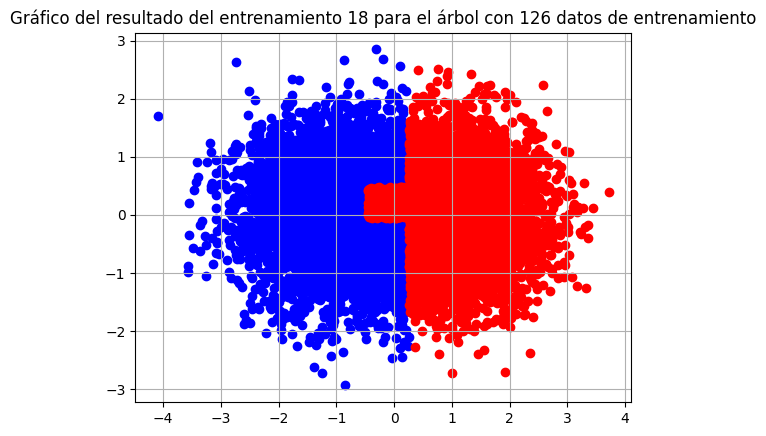

In [993]:
# Diccionarios con las métricas
errores_entrenamiento_paralelas = pd.DataFrame({"126":[], "250":[], "500":[], "1000":[], "2000":[], "4000":[]})
errores_test_paralelas = pd.DataFrame({"126":[], "250":[], "500":[], "1000":[], "2000":[], "4000":[]})
numnodos_paralelas = pd.DataFrame({"126":[], "250":[], "500":[], "1000":[], "2000":[], "4000":[]})

metricas2d(dfs126, clases126, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "126", dftest, clasestest)

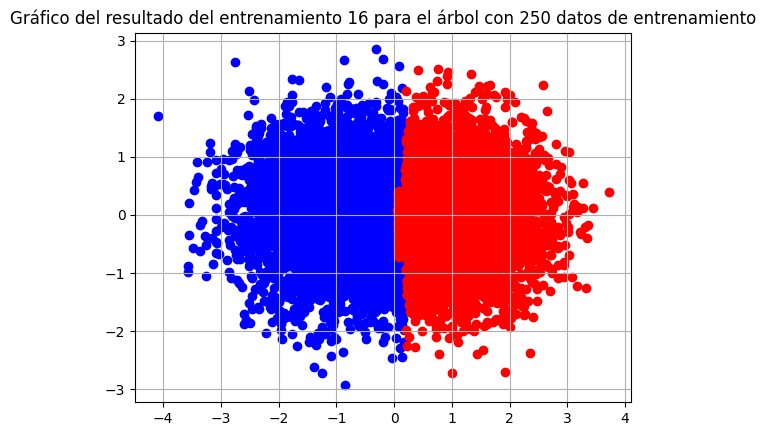

In [994]:
metricas2d(dfs250, clases250, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "250", dftest, clasestest)

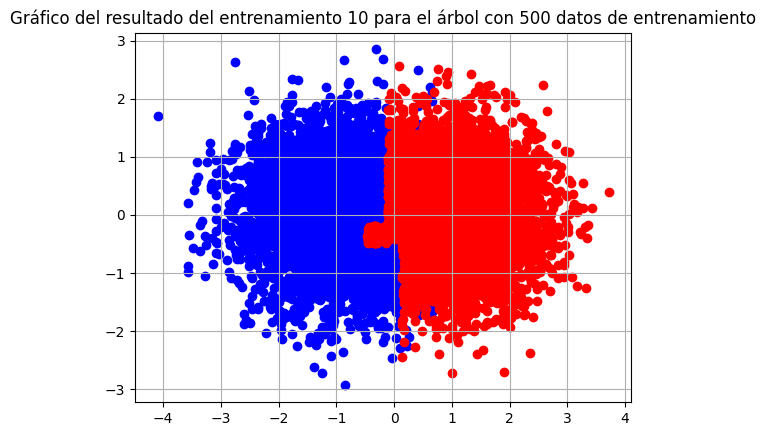

In [995]:
metricas2d(dfs500, clases500, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "500", dftest, clasestest)

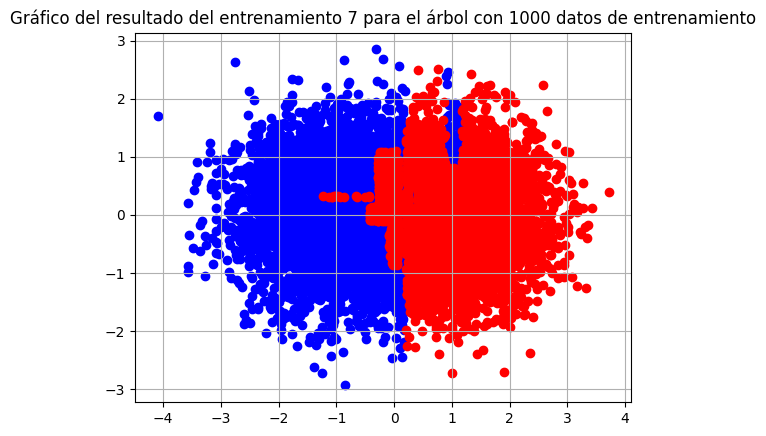

In [996]:
metricas2d(dfs1000, clases1000, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "1000", dftest, clasestest)

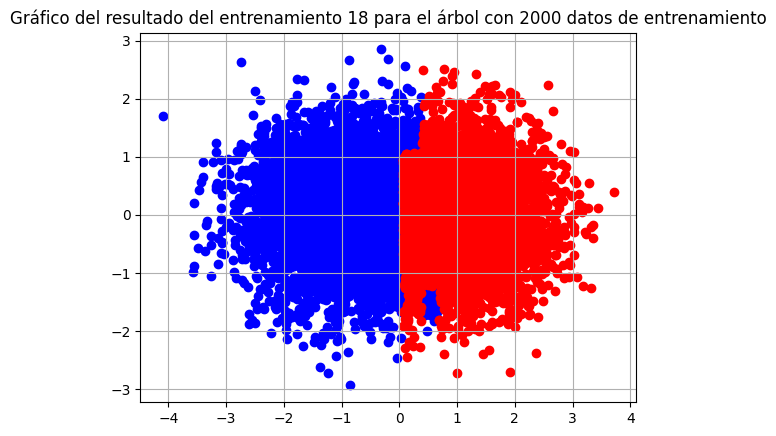

In [997]:
metricas2d(dfs2000, clases2000, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "2000", dftest, clasestest)

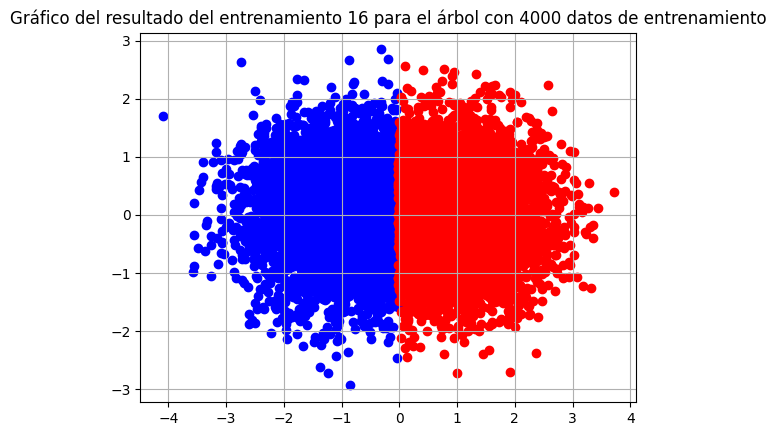

In [998]:
metricas2d(dfs4000, clases4000, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "4000", dftest, clasestest)

A primera vista, incrementar la cantidad de datos de entrenamiento en este caso sí parece aumentar la calidad del modelo.

En este caso el modelo parece significativamente más simple al ser más fácil la predicción en forma de intervalos (x < 0 o x > 0). Entonces, a medida que el modelo tiene más datos de entrenamiento, se aproxima más a esta regla, que al conocer nosotros la forma en que se creó el dataset, sabemos que es una buena forma de predecir.

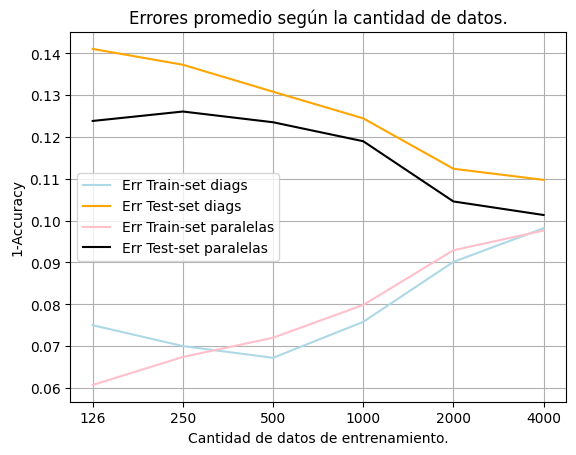

In [999]:
# Plotteando diagonales
x = errores_entrenamiento_diag.mean().index
y = errores_entrenamiento_diag.mean()
plt.plot(x, y, color="lightblue", label="Err Train-set diags")
x = errores_test_diag.mean().index
y = errores_test_diag.mean()
plt.plot(x, y, color="orange", label="Err Test-set diags")
# Plotteando paralelas
x = errores_entrenamiento_paralelas.mean().index
y = errores_entrenamiento_paralelas.mean()
plt.plot(x, y, color="pink", label="Err Train-set paralelas")
x = errores_test_paralelas.mean().index
y = errores_test_paralelas.mean()
plt.plot(x, y, color="black", label="Err Test-set paralelas")
plt.xlabel("Cantidad de datos de entrenamiento.")
plt.ylabel("1-Accuracy")
plt.legend()
plt.title("Errores promedio según la cantidad de datos.")
plt.grid(True)
plt.show()

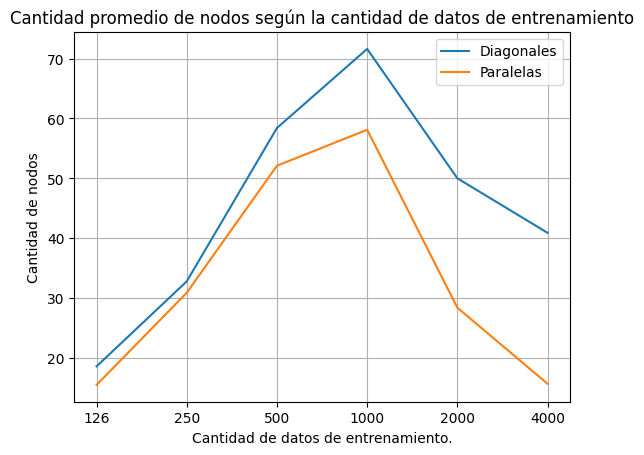

In [1000]:
x = numnodos_diag.mean().index
y = numnodos_diag.mean()
plt.plot(x,y, label="Diagonales")
x = numnodos_paralelas.mean().index
y = numnodos_paralelas.mean()
plt.plot(x,y, label="Paralelas")
plt.legend()
plt.title("Cantidad promedio de nodos según la cantidad de datos de entrenamiento")
plt.xlabel("Cantidad de datos de entrenamiento.")
plt.ylabel("Cantidad de nodos")
plt.grid(True)
plt.show()

En primer lugar, sucede el mismo fenómeno que con las diagonales: a partir de cierto punto, tanto el error como la cantidad de nodos disminuye en el modelo. Es más, en este caso, como discutimos, el modelo termina siendo significativamente más sencillo por la forma de los datos, lo cual lleva a que la cantidad de nodos sea igualmente significativamente menor para modelos entrenados con conjuntos de mayor tamaño.

## Ejercicio 3

### Diagonales

Creamos los datasets de entrenamiento y testing

In [1001]:
# El primer dataset lo creamos con 126 datos para que ambas clases tengan la misma cantidad de datos.
(dfs5Diag, clas5Diag) = crear_conjs_diag(250, 5, 0.5, 20)
(dfs10Diag, clas10Diag) = crear_conjs_diag(250, 5, 1.0, 20)
(dfs15Diag, clas15Diag) = crear_conjs_diag(250, 5, 1.5, 20)
(dfs20Diag, clas20Diag) = crear_conjs_diag(250, 5, 2.0, 20)
(dfs25Diag, clas25Diag) = crear_conjs_diag(250, 5, 2.5, 20)

(dftestL, clasT5Diag) = crear_conjs_diag(10000, 5, 0.5, 1)
dfT5Diag = dftestL[0]
(dftestL, clasT10Diag) = crear_conjs_diag(10000, 5, 1.0, 1)
dfT10Diag = dftestL[0]
(dftestL, clasT15Diag) = crear_conjs_diag(10000, 5, 1.5, 1)
dfT15Diag = dftestL[0]
(dftestL, clasT20Diag) = crear_conjs_diag(10000, 5, 2.0, 1)
dfT20Diag = dftestL[0]
(dftestL, clasT25Diag) = crear_conjs_diag(10000, 5, 2.5, 1)
dfT25Diag = dftestL[0]

Creamos y evaluamos los modelos

In [1002]:
def metricas_no_graph(dfs, clases, dfsresultados, columnaresultados, dftest, clasestest):
	# dfs resultados = (errores_entrenamiento, errores_test, numnodos)

	errs_test = []
	errs_train = []
	nnodes = []
	for i in range(20):
		# Creando árbol de decisión
		clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
		clf.fit(dfs[i], clases)

		# Prediciendo sobre el conjunto de test y de entrenamiento 
		y_pred_test = clf.predict(dftest)
		y_pred_train = clf.predict(dfs[i])
		
		# Guardando resultados
		errs_test.append(1-accuracy_score(clasestest, y_pred_test))
		errs_train.append(1-accuracy_score(clases, y_pred_train))
		nnodes.append(clf.tree_.node_count)
		
	dfsresultados[0][columnaresultados] = errs_train
	dfsresultados[1][columnaresultados] = errs_test
	dfsresultados[2][columnaresultados] = nnodes

In [1003]:
# Diccionarios con las métricas
errores_entrenamiento_diag = pd.DataFrame({"0.5":[], "1.0":[], "1.5":[], "2.0":[], "2.5":[]})
errores_test_diag = pd.DataFrame({"0.5":[], "1.0":[], "1.5":[], "2.0":[], "2.5":[]})
numnodos_diag = pd.DataFrame({"0.5":[], "1.0":[], "1.5":[], "2.0":[], "2.5":[]})

metricas_no_graph(dfs5Diag, clas5Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "0.5", dfT5Diag, clasT5Diag)
metricas_no_graph(dfs10Diag, clas10Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "1.0", dfT10Diag, clasT10Diag)
metricas_no_graph(dfs15Diag, clas15Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "1.5", dfT15Diag, clasT15Diag)
metricas_no_graph(dfs20Diag, clas20Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "2.0", dfT20Diag, clasT20Diag)
metricas_no_graph(dfs25Diag, clas25Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "2.5", dfT25Diag, clasT25Diag)

### Paralelas

Creamos los datasets de entrenamiento y testing

In [1004]:
# El primer dataset lo creamos con 126 datos para que ambas clases tengan la misma cantidad de datos.
(dfs5Par, clas5Par) = crear_conjs_paralelas(250, 5, 0.5, 20)
(dfs10Par, clas10Par) = crear_conjs_paralelas(250, 5, 1.0, 20)
(dfs15Par, clas15Par) = crear_conjs_paralelas(250, 5, 1.5, 20)
(dfs20Par, clas20Par) = crear_conjs_paralelas(250, 5, 2.0, 20)
(dfs25Par, clas25Par) = crear_conjs_paralelas(250, 5, 2.5, 20)

(dftestL, clasT5Par) = crear_conjs_paralelas(10000, 5, 0.5, 1)
dfT5Par = dftestL[0]
(dftestL, clasT10Par) = crear_conjs_paralelas(10000, 5, 1.0, 1)
dfT10Par = dftestL[0]
(dftestL, clasT15Par) = crear_conjs_paralelas(10000, 5, 1.5, 1)
dfT15Par = dftestL[0]
(dftestL, clasT20Par) = crear_conjs_paralelas(10000, 5, 2.0, 1)
dfT20Par = dftestL[0]
(dftestL, clasT25Par) = crear_conjs_paralelas(10000, 5, 2.5, 1)
dfT25Par = dftestL[0]

Evaluamos los modelos

In [1005]:
# Diccionarios con las métricas
errores_entrenamiento_paralelas = pd.DataFrame({"0.5":[], "1.0":[], "1.5":[], "2.0":[], "2.5":[]})
errores_test_paralelas = pd.DataFrame({"0.5":[], "1.0":[], "1.5":[], "2.0":[], "2.5":[]})
numnodos_paralelas = pd.DataFrame({"0.5":[], "1.0":[], "1.5":[], "2.0":[], "2.5":[]})

metricas_no_graph(dfs5Par, clas5Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "0.5", dfT5Par, clasT5Par)
metricas_no_graph(dfs10Par, clas10Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "1.0", dfT10Par, clasT10Par)
metricas_no_graph(dfs15Par, clas15Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "1.5", dfT15Par, clasT15Par)
metricas_no_graph(dfs20Par, clas20Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "2.0", dfT20Par, clasT20Par)
metricas_no_graph(dfs25Par, clas25Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "2.5", dfT25Par, clasT25Par)

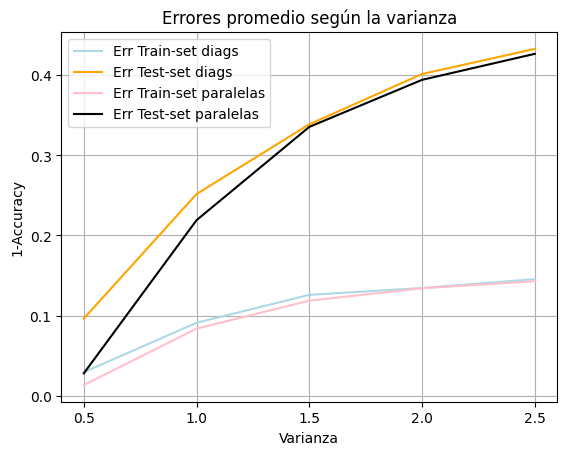

In [1006]:
# Plotteando diagonales
x = errores_entrenamiento_diag.mean().index
y = errores_entrenamiento_diag.mean()
plt.plot(x, y, color="lightblue", label="Err Train-set diags")
x = errores_test_diag.mean().index
y = errores_test_diag.mean()
plt.plot(x, y, color="orange", label="Err Test-set diags")
# Plotteando paralelas
x = errores_entrenamiento_paralelas.mean().index
y = errores_entrenamiento_paralelas.mean()
plt.plot(x, y, color="pink", label="Err Train-set paralelas")
x = errores_test_paralelas.mean().index
y = errores_test_paralelas.mean()
plt.plot(x, y, color="black", label="Err Test-set paralelas")
plt.xlabel("Varianza")
plt.ylabel("1-Accuracy")
plt.legend()
plt.title("Errores promedio según la varianza")
plt.grid(True)
plt.show()

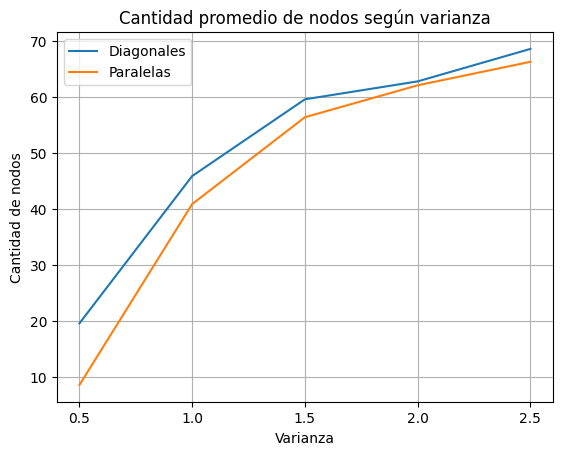

In [1007]:
x = numnodos_diag.mean().index
y = numnodos_diag.mean()
plt.plot(x,y, label="Diagonales")
x = numnodos_paralelas.mean().index
y = numnodos_paralelas.mean()
plt.plot(x,y, label="Paralelas")
plt.legend()
plt.title("Cantidad promedio de nodos según varianza")
plt.xlabel("Varianza")
plt.ylabel("Cantidad de nodos")
plt.grid(True)
plt.show()

Tiene sentido que a medida que la varianza incrementa, se vuelve más difícil predecir con correctitud la clase de un valor. No solo esto, sino que 

### Ejercicio 3.1 - Clasificadores de Bayes

Intuitivamente, podemos inferir la forma óptima de clasificar: en el caso de 2 dimensiones, sabemos que para diagonales es si x < y, y para paralalelas, si x < 0. Por lo tanto, podemos crear un clasificador ideal de Bayes en base a estas reglas.

Importamos el modelo bayesiano de sklearn.

In [1008]:
from sklearn.naive_bayes import GaussianNB
def metricasBayes(df, clases, errordf, columnaresultados):
	gnb = GaussianNB()
	gnb.fit(df, clases)
	
	clasesPred = gnb.predict(df)

	err = 1-accuracy_score(clases, clasesPred)
	
	errordf[columnaresultados] = [err]

Ahora, podemos proceder a obtener las métricas de cada predicción.

In [1009]:
errores_diag = pd.DataFrame({"0.5":[], "1.0":[], "1.5":[], "2.0":[], "2.5":[]})
errores_paralelas = pd.DataFrame({"0.5":[], "1.0":[], "1.5":[], "2.0":[], "2.5":[]})

metricasBayes(dfT5Diag, clasT5Diag, errores_diag, "0.5")
metricasBayes(dfT10Diag, clasT10Diag, errores_diag, "1.0")
metricasBayes(dfT15Diag, clasT15Diag, errores_diag, "1.5")
metricasBayes(dfT20Diag, clasT20Diag, errores_diag, "2.0")
metricasBayes(dfT25Diag, clasT25Diag, errores_diag, "2.5")

metricasBayes(dfT5Par, clasT5Par, errores_paralelas, "0.5")
metricasBayes(dfT10Par, clasT10Par, errores_paralelas, "1.0")
metricasBayes(dfT15Par, clasT15Par, errores_paralelas, "1.5")
metricasBayes(dfT20Par, clasT20Par, errores_paralelas, "2.0")
metricasBayes(dfT25Par, clasT25Par, errores_paralelas, "2.5")

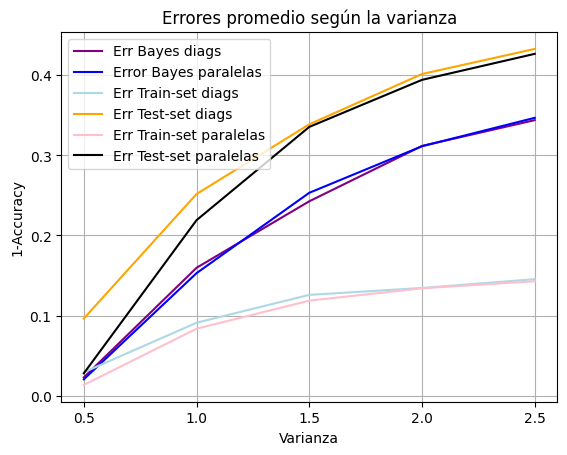

In [1010]:
# Plotteando diagonales
x = errores_diag.mean().index
y = errores_diag.mean()
plt.plot(x, y, color="purple", label="Err Bayes diags")
# Plotteando paralelas
x = errores_paralelas.mean().index
y = errores_paralelas.mean()
plt.plot(x, y, color="blue", label="Error Bayes paralelas")


x = errores_entrenamiento_diag.mean().index
y = errores_entrenamiento_diag.mean()
plt.plot(x, y, color="lightblue", label="Err Train-set diags")
x = errores_test_diag.mean().index
y = errores_test_diag.mean()
plt.plot(x, y, color="orange", label="Err Test-set diags")
# Plotteando paralelas
x = errores_entrenamiento_paralelas.mean().index
y = errores_entrenamiento_paralelas.mean()
plt.plot(x, y, color="pink", label="Err Train-set paralelas")
x = errores_test_paralelas.mean().index
y = errores_test_paralelas.mean()
plt.plot(x, y, color="black", label="Err Test-set paralelas")
plt.xlabel("Varianza")
plt.ylabel("1-Accuracy")
plt.legend()
plt.title("Errores promedio según la varianza")
plt.xlabel("Varianza")
plt.ylabel("1-Accuracy")
plt.legend()
plt.title("Errores promedio según la varianza")
plt.grid(True)
plt.show()

Vemos claramente cómo el error para el método de Bayes es menor en casi todos los casos para el conjunto de test, como es de esperar, con una diferencia que se reduce a medida que sube la varianza en el caso de las paralelas, llegando a igualarse al error de la función de Bayes.

Por otro lado, resulta interesante observar que el error de las funciones de Bayes es prácticamente igual para los conjuntos diagonales y paralelos. Esto puede explicarse con el hecho que ahora, la función de bayes no tiene el problema de los intervalos matemáticos paralelos a los ejes. Esto resulta evidente cuando pensamos en la función de Bayes en 2 dimensiones que diseñamos anteriormente.

Por otro lado, en el conjunto de entrenamiento, vemos que los árboles de decisión predicen de forma muy precisa para sus propios conjuntos de entrenamiento. Aunque pueda parecer extraño en un comienzo que de un mejor resultado que para la función de Bayes, esto tiene sentido, al estar los árboles de decisión hechos de forma específica para predecir correctamente sobre sus conjuntos de entrenamiento, lo cual no siempre se traduce en una mejor capacidad de generalización, pero que puede dar muy buenos resultados para sus propios conjuntos de entrenamiento.

## Ejercicio 4

### Diagonales

In [1011]:
# El primer dataset lo creamos con 126 datos para que ambas clases tengan la misma cantidad de datos.
(dfs2Diag, clas2Diag) = crear_conjs_diag(250, 2, 0.78, 20)
(dfs4Diag, clas4Diag) = crear_conjs_diag(250, 4, 0.78, 20)
(dfs8Diag, clas8Diag) = crear_conjs_diag(250, 8, 0.78, 20)
(dfs16Diag, clas16Diag) = crear_conjs_diag(250, 16, 0.78, 20)
(dfs32Diag, clas32Diag) = crear_conjs_diag(250, 32, 0.78, 20)

(dftestL, clasT2Diag) = crear_conjs_diag(10000, 2, 0.78, 1)
dfT2Diag = dftestL[0]
(dftestL, clasT4Diag) = crear_conjs_diag(10000, 4, 0.78, 1)
dfT4Diag = dftestL[0]
(dftestL, clasT8Diag) = crear_conjs_diag(10000, 8, 0.78, 1)
dfT8Diag = dftestL[0]
(dftestL, clasT16Diag) = crear_conjs_diag(10000, 16, 0.78, 1)
dfT16Diag = dftestL[0]
(dftestL, clasT32Diag) = crear_conjs_diag(10000, 32, 0.78, 1)
dfT32Diag = dftestL[0]

In [1012]:
# Diccionarios con las métricas
errores_entrenamiento_diag = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})
errores_test_diag = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})
numnodos_diag = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})

# No utilizamos numnodos_diag, pero no queremos redefinir la función.
metricas_no_graph(dfs2Diag, clas2Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "2", dfT2Diag, clasT2Diag)
metricas_no_graph(dfs4Diag, clas4Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "4", dfT4Diag, clasT4Diag)
metricas_no_graph(dfs8Diag, clas8Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "8", dfT8Diag, clasT8Diag)
metricas_no_graph(dfs16Diag, clas16Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "16", dfT16Diag, clasT16Diag)
metricas_no_graph(dfs32Diag, clas32Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "32", dfT32Diag, clasT32Diag)

### Paralelas

In [1013]:
# El primer dataset lo creamos con 126 datos para que ambas clases tengan la misma cantidad de datos.
(dfs2Par, clas2Par) = crear_conjs_paralelas(250, 2, 0.78, 20)
(dfs4Par, clas4Par) = crear_conjs_paralelas(250, 4, 0.78, 20)
(dfs8Par, clas8Par) = crear_conjs_paralelas(250, 8, 0.78, 20)
(dfs16Par, clas16Par) = crear_conjs_paralelas(250, 16, 0.78, 20)
(dfs32Par, clas32Par) = crear_conjs_paralelas(250, 32, 0.78, 20)

(dftestL, clasT2Par) = crear_conjs_paralelas(10000, 2, 0.78, 1)
dfT2Par = dftestL[0]
(dftestL, clasT4Par) = crear_conjs_paralelas(10000, 4, 0.78, 1)
dfT4Par = dftestL[0]
(dftestL, clasT8Par) = crear_conjs_paralelas(10000, 8, 0.78, 1)
dfT8Par = dftestL[0]
(dftestL, clasT16Par) = crear_conjs_paralelas(10000, 16, 0.78, 1)
dfT16Par = dftestL[0]
(dftestL, clasT32Par) = crear_conjs_paralelas(10000, 32, 0.78, 1)
dfT32Par = dftestL[0]

In [1014]:
errores_entrenamiento_paralelas = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})
errores_test_paralelas = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})
numnodos_paralelas = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})
metricas_no_graph(dfs2Par, clas2Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "2", dfT2Par, clasT2Par)
metricas_no_graph(dfs4Par, clas4Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "4", dfT4Par, clasT4Par)
metricas_no_graph(dfs8Par, clas8Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "8", dfT8Par, clasT8Par)
metricas_no_graph(dfs16Par, clas16Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "16", dfT16Par, clasT16Par)
metricas_no_graph(dfs32Par, clas32Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "32", dfT32Par, clasT32Par)

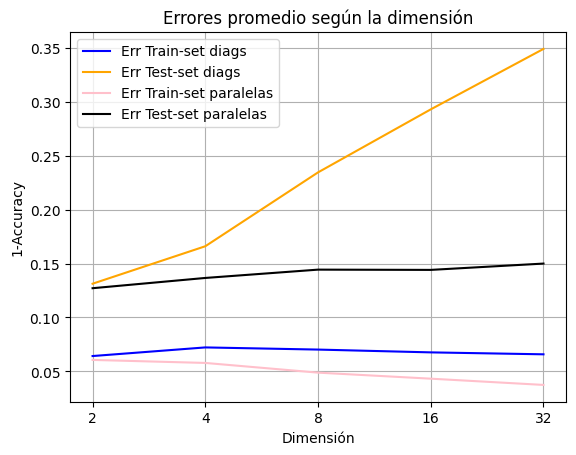

In [1015]:
# Plotteando diagonales
x = errores_entrenamiento_diag.mean().index
y = errores_entrenamiento_diag.mean()
plt.plot(x, y, color="blue", label="Err Train-set diags")
x = errores_test_diag.mean().index
y = errores_test_diag.mean()
plt.plot(x, y, color="orange", label="Err Test-set diags")
# Plotteando paralelas
x = errores_entrenamiento_paralelas.mean().index
y = errores_entrenamiento_paralelas.mean()
plt.plot(x, y, color="pink", label="Err Train-set paralelas")
x = errores_test_paralelas.mean().index
y = errores_test_paralelas.mean()
plt.plot(x, y, color="black", label="Err Test-set paralelas")
plt.xlabel("Dimensión")
plt.ylabel("1-Accuracy")
plt.legend()
plt.title("Errores promedio según la dimensión")
plt.grid(True)
plt.show()

Interesantemente, ocurren dos fenómenos completamente distintos para las dos distribuciones de datos que utilizamos. Para las paralelas, vemos que la precisión casi no se ve afectada por la dimensionalidad de los datos, mientras que, para las distribuciones diagonales, el error de entrenamiento se mantiene constante mientras que el de test aumenta de manera logarítmica (funciones que parecen lineales sobre una escala logarítmica), lo cual parece indicar que con el aumento de dimensiones, el modelo sobreajusta incrementalmente, no siendo bueno para generalizar los resultados.

Esto debe explicarse por un fenómeno similar al que vimos en el caso de 2 dimensiones, pero con un peso cada vez mayor. Como el árbol de decisión toma decisiones que definen regiones con aristas paralelas a los ejes, al ser de la forma x > n, y > m, z > k, etc..., la división de las clases en la distribución paralela es más fácilmente reconocible mediante una región paralela a los ejes.

## Ejercicio 5

In [1016]:
df = pd.read_csv("xor.csv", header=None)
df.rename(columns={0:"x", 1:"y", 2:"Clase"}, inplace=True)
df.head(5)

,x,y,Clase
0,-0.849239,-0.401593,0
1,-0.543565,-0.084384,0
2,-0.548631,-0.566637,0
3,-0.385907,-0.309610,0
4,0.611682,0.944334,0


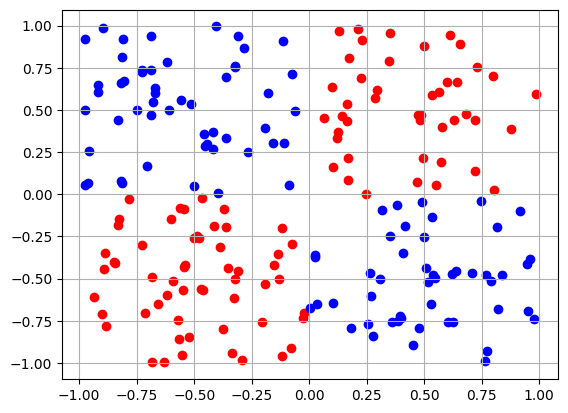

In [1017]:
graficarRes(df["Clase"], df[["x", "y"]])


Vemos que el dataset tiene elementos donde la clase 0 son (x,y) en R2 tal que x*y >= 0, y el resto son de la clase 1. 

El árbol más simple tendría la siguiente forma:

```
                 x>0
              /       \
             /         \
        True/           \False
           /             \
       y>=0               y<=0
   True/   \False      True/   \False
      /     \             /     \
Clase 0    Clase 1  Clase_0     Clase 1
```
Notemos que es arbitrario cómo elijamos las clases para los valores donde x*y = 0, y de hecho en la vida real, con intervalos continuos, no debería ocurrir que obtengamos por lo que 

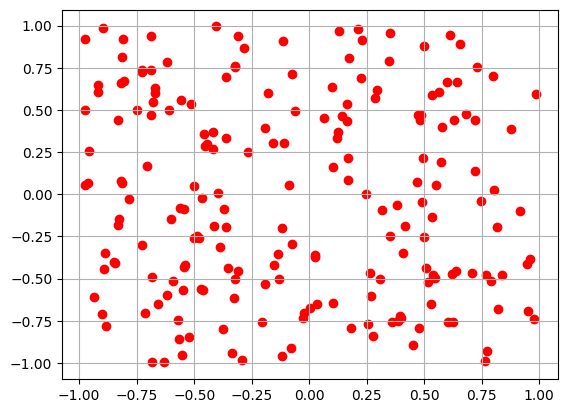

In [1018]:
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5)
clf.fit(df[["x", "y"]], df["Clase"])
y_pred = clf.predict(df[["x", "y"]])

graficarRes(y_pred, df[["x", "y"]])


[Text(0.5, 0.5, 'entropy = 1.0\nsamples = 200\nvalue = [100, 100]')]

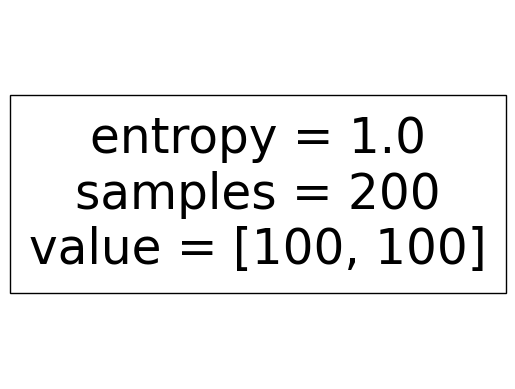

In [1019]:
tree.plot_tree(clf)

El fenómeno observado se debe a que cualquier partición de los datos respecto a un eje resulta en subconjuntos con proporciones similares de las clases objetivo a la distribución inicial. Esto lleva a que todas las subdivisiones mantengan una entropía cercana a la inicial. Dado que la ganancia de información, o disminución de la impureza, lograda por cualquier partición potencial es insuficiente para alcanzar el umbral establecido por el parámetro de “min_impurity_decrease” (de 0.03), el algoritmo determina que no hay una partición que contribuya significativamente a la pureza de las clases. En consecuencia, el árbol de decisión resultante no realiza ninguna bifurcación y asigna todos los valores a la misma clase.

Este comportamiento puede indicar que las características seleccionadas no tienen la capacidad discriminativa necesaria o que el umbral de “min_impurity_decrease” está establecido demasiado alto para permitir una separación efectiva de las clases en el espacio de características dado.

Esto lo podemos comprobar simplemente reduciendo el valor de "min_impurity_decrease":

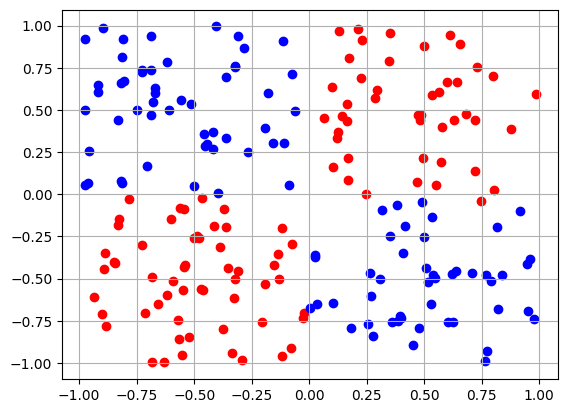

In [1020]:
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.001,random_state=0,min_samples_leaf=5)
clf.fit(df[["x", "y"]], df["Clase"])
y_pred = clf.predict(df[["x", "y"]])

graficarRes(y_pred, df[["x", "y"]])

En efecto, como predijimos, reducir el valor de la variable, obtenemos un resultado más similar al que esperabamos. 